In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import ndimage

name="sac10S1"
mat = scipy.io.loadmat('D:\EOG project\IsolatedSaccades\%s.mat'%(name))
y=np.ndarray.flatten((mat[name]))
ecs=np.arange(len(y))
fig, axs = plt.subplots()

def normalize(wave:np.ndarray)->np.ndarray:
    """Normalizes a given waveform

    :param wave: input wave
    :type wave: np.ndarray
    :return: output wave
    :rtype: np.ndarray
    """
    Max,Min=max(wave),min(wave)
    wave=(wave-Min)/(Max-Min)
    return wave

def delay_com(y:np.ndarray,d:int)->np.ndarray:
    """Time-delays, a given input ECG

    :param y: Input ECG
    :type y: np.ndarray
    :param d: indicates the number of samples for the delay
    :type d: int
    :return: delayed ECG
    :rtype: np.ndarray
    """
    return np.append(y[d:],np.zeros(d))

def Low_pass(x:np.ndarray)->np.ndarray:
    """Low_pass filter for a given ECG

    :param x: input ECG signal
    :type x: np.ndarray
    :return: low passed ECG signal
    :rtype: np.ndarray
    """
    y=np.copy(x)
    y[0]=x[0]
    y[1]=2*y[0]+x[1]
    for i in range(2,len(x)):
        if 2<=i<6:
            y[i]=2*y[i-1]+x[i]-y[i-2]
        if 6<=i<12:
            y[i]=2*y[i-1]+x[i]-y[i-2]-2*x[i-6]
        if i>=12:
            y[i]=2*y[i-1]+x[i]-y[i-2]-2*x[i-6]+x[i-12]
    return delay_com(y/36,4)
    
def IIR(x:np.ndarray,Fc=0.65,Baseline=False,delay=30)->np.ndarray:
    """IIR filter that acts as to remove the low frequency noise in ECG

    :param x: Input ecg
    :type x: np.ndarray
    :param Fc: Cutoff frequency, defaults to 0.65
    :type Fc: float, optional
    :param Baseline: Indicates whether the output should be baseline estimation or not, defaults to False
    :type Baseline: bool, optional
    :param delay: Number of samples that should be delayed, defaults to 30
    :type delay: int, optional
    :return: Filtered ECG signal
    :rtype: np.ndarray
    """  # noqa: E501
    delta=0.6
    Fs=360
    g=np.tan(np.pi*Fc*0.001/Fs)
    y=np.copy(x)

    g1=1+2*delta*g+g**2
    g2=2*g**2-2
    g3=1-2*delta*g+g**2

    b=g**2/g1
    a2=g2/g1
    a3=g3/g1
    
    y[1]=b*x[1]+(3*b-a3)*x[0]-a2*y[0]

    for i in range(2,len(x)):
        y[i]= b*(x[i]+x[i-1]+x[i-2])-a2*y[i-1]-a3*y[i-2]

    y=y[::-1]
    y[0]=x[0]
    y[1]=b*x[1]+(3*b-a3)*x[0]-a2*y[0]

    for i in range(2,len(x)):
        y[i]= b*(x[i]+x[i-1]+x[i-2])-a2*y[i-1]-a3*y[i-2]
    y=delay_com(y,delay)
    if Baseline:
        return y
    y=np.subtract(x,y)
    return y

y=normalize(y)
#axs.plot(ecs,y)
y=normalize(IIR(Low_pass(y)))
base=ndimage.median_filter(y,size=250)
axs.plot(ecs,y)
axs.plot(ecs,base)
plt.show()

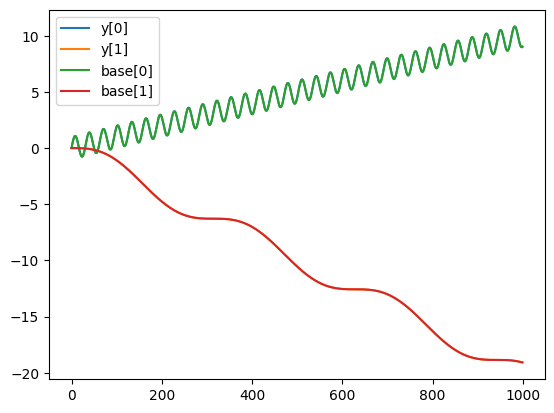

In [2]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from scipy import signal

x=np.arange(1000)
y=np.zeros((2,1000))
y[0]=np.sin(x/5)+x/100
y[1]=np.sin(x/50)-x/50

# base=ndimage.median_filter(y,size=[250,250])
base=np.zeros((2,1000))
for r in range(2):
    base[r]=signal.medfilt(y[r], kernel_size=3)
#base=signal.medfilt(y, kernel_size=3)
plt.plot(x,y[0])
plt.plot(x,y[1])
plt.plot(x,base[0])
plt.plot(x,base[1])
plt.legend(["y[0]","y[1]","base[0]","base[1]"])
plt.show()

In [3]:
a=np.array([[1,10,11],[4,5,6]])

In [34]:
a[:,1]

array([10,  5])

In [5]:
a+np.array([[2],[7]])

array([[ 3, 12, 13],
       [11, 12, 13]])

In [36]:
a>(a[:,1]+np.var(a,axis=1)).reshape(2,1)

array([[False, False, False],
       [False, False,  True]])

In [37]:
a[:,:] = (a[:,1]+np.var(a,axis=1)).reshape(2,1)
print(a)

[[30 30 30]
 [ 5  5  5]]


In [92]:
arr1=a>10
arr2=a<5
decision_arr1=np.zeros((4,4))
for r in range(4):
    for i in range(4):
        if arr1[r][i]==True:
            decision_arr1[r][i]=1
        elif arr2[r][i]==True:
            decision_arr1[r][i]=-1
        else:
            decision_arr1[r][i]=0
decision_arr1

array([[-1., -1., -1.,  1.],
       [-1.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  1.,  1.]])

In [91]:
decision_arr1

array([[ True,  True,  True,  True],
       [ True, False, False,  True],
       [False, False, False,  True],
       [False,  True,  True,  True]])

In [110]:
b=np.zeros((10))
b[0]=1
b
c=[]

In [111]:
c=b[0:4]

In [112]:
c

array([1., 0., 0., 0.])

In [1]:
import pyautogui
